아래의 코드는 한글깨짐 현상을 방지하기 위한 설정입니다. 코드 실행하면 한글 설정 완료 됩니다. 세션시작마다 실행한 후, 세션 재시작!

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

<br/>
<br/>
<br/>

---

<br/>

# 이변량 분석
이변량 분석은 두 개의 변수 간 관계를 파악하기 위한 탐색적 데이터 분석 방법입니다.
두 변수의 상관성, 영향 관계, 차이 등을 시각화 및 통계 기법을 통해 분석합니다.
<br/>

#### ✅ 분석 대상
- 숫자형 vs 숫자형: 산점도, 상관계수(피어슨, 스피어만), 회귀선
- 범주형 vs 숫자형: 그룹별 평균 비교 (박스플롯), t-test, ANOVA
- 범주형 vs 범주형: 교차표, 모자이크 플롯, 카이제곱 검정

<br/>
<br/>

분석 유형에 따라 다음 문제들을 해결해봅시다.

<br/>
<br/>

## **이변량 분석 1: 숫자형-숫자형 변수 분석하기**






In [4]:
import pandas as pd

data = {
    'study_hours': [1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 7, 8, 9, 10],
    'exam_score': [52, 55, 60, 62, 64, 68, 72, 75, 78, 82, 85, 88, 90, 94]
}
df = pd.DataFrame(data)
df.head()


,study_hours,exam_score
0,1,52
1,2,55
2,2,60
3,3,62
4,3,64


## 💡 실습 주제  
> **“학생의 공부 시간과 시험 점수 간의 관계를 분석하고, 양의 상관관계가 있는지 검정해봅니다.”**


--> 산점도, 피어슨 상관계수 활용


- 귀무가설(H₀): 공부 시간과 시험 점수 사이에는 상관관계가 없다.

- 대립가설(H₁): 공부 시간이 증가할수록 시험 점수도 증가하는 경향이 있다. (양의 상관관계)




---

## 🖼️ 왜 시각화는 산점도(Scatter Plot)를 사용할까?

- 산점도는 **숫자형 변수 두 개의 관계**를 볼 때 가장 많이 쓰이는 그래프입니다.
- 각 점은 **한 명의 학생**을 나타내고,  
  x축은 공부 시간, y축은 시험 점수로 표현됩니다.
- 이렇게 시각화하면,  
  공부 시간이 늘어날수록 점수가 올라가는지 **시각적으로 한눈에 확인**할 수 있습니다.

> ✅ 공부 시간과 점수 간에 "올라가는 경향"이 보이면 → **양의 상관관계**  
> ✅ 반대로 "한쪽이 올라갈수록 다른 쪽은 내려가는 경향" → **음의 상관관계**

---

## 📈 왜 피어슨 상관계수(Pearson correlation)와 p-value를 볼까?

### 📌 피어슨 상관계수란?
- 두 숫자형 변수 사이의 **선형 관계**를 수치로 표현한 값입니다.
- 값의 범위는 **-1에서 1 사이**이며,
  - **+1에 가까울수록**: 강한 양의 상관관계 (공부 많이 → 점수 높음)
  - **-1에 가까울수록**: 강한 음의 상관관계 (공부 많이 → 점수 낮음)
  - **0에 가까울수록**: 거의 관계 없음

### 📌 p-value는 무엇인가요?
- 상관계수가 **우연히 나온 값인지**,  
  아니면 **통계적으로 유의미한 관계인지**를 검정하는 값입니다.
- 보통 p-value가 **0.05보다 작으면**,  
  "이건 우연이 아니라, 실제 관계가 있다"고 해석합니다.

> ✅ 피어슨 상관계수: 관계의 **방향과 세기**  
> ✅ p-value: 그 관계가 **통계적으로 의미 있는지** 여부

---

## 🔎 정리

| 분석 요소        | 왜 사용하는가? |
|------------------|----------------|
| **산점도**           | 두 숫자 변수 간의 **관계를 눈으로 확인**하기 위해 |
| **피어슨 상관계수**  | 두 변수 간의 **선형 관계가 얼마나 강한지 수치로 표현**하기 위해 |
| **p-value**          | 이 관계가 **우연인지 아닌지 통계적으로 검정**하기 위해 |





<br/>
<br/>
<br/>



문제 1) **산점도(Scatter plot)**를 그리고, 관계의 형태를 시각적으로 파악하시오.

**산점도**는 두 수치형 변수 간의 관계를 점으로 나타낸 그래프입니다.

점들의 **분포**를 통해 경향성을 파악할 수 있습니다.


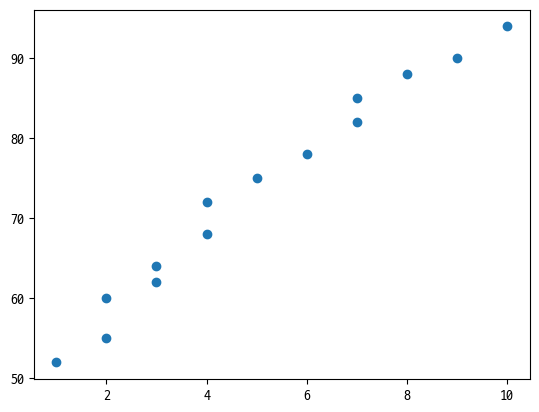

In [5]:
# 여기에 코드를 작성하세요!
import matplotlib.pyplot as plt

plt.scatter(df['study_hours'], df['exam_score'])
plt.show()

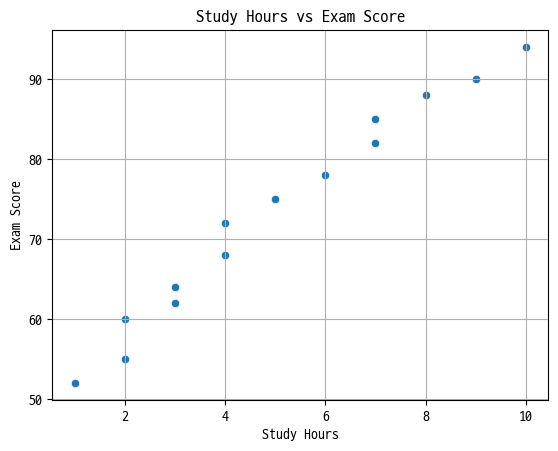

In [6]:
# 모범 답안

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. 산점도 그리기
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()







<br/><br/>

문제 2) scipy.stats.pearsonr 함수를 이용해 피어슨 상관계수와 p-value를 구하시오.

**피어슨 상관계수**는 두 수치형 변수 간의 **선형 관계의 강도**를 나타냅니다.

**p-value**는 해당 상관관계가 **통계적으로 유의미한지**를 판단하는 기준입니다.


In [7]:
# 여기에 코드를 작성하세요!
from scipy.stats import pearsonr # as는 모듈,클래스,함수 전체에만(라이브러리) 사용 가능함. pearsonr는 함수이므로 as를 사용할 수 없음.

r, p_value = pearsonr(df['study_hours'], df['exam_score']) # 상관계수 r과 p-value를 반환
print(f"피어슨 상관계수: {r}")
print(f"p-value: {p_value}")

피어슨 상관계수: 0.9875388987645619
p-value: 5.262660932053312e-11


In [8]:
# 모범답안

# 2. 상관계수 및 p-value 계산
corr, p_value = pearsonr(df['study_hours'], df['exam_score'])
print(f"📌 피어슨 상관계수: {corr:.2f}")
print(f"📌 p-value: {p_value:.4f}")


📌 피어슨 상관계수: 0.99
📌 p-value: 0.0000


<br/><br/>

문제 3) 검정 결과를 바탕으로 귀무가설 기각 여부와 결론을 기술하시오.

##### [결과 해석]
- 상관계수가 약 0.98로 매우 강한 양의 상관관계를 나타냅니다.

- p-value < 0.05이므로, 귀무가설은 기각됩니다.

- 즉, 공부 시간이 많을수록 시험 점수가 유의하게 증가하는 경향이 있습니다.

- 시각적으로도 오른쪽 위로 향하는 추세를 확인할 수 있습니다.

<br/>

---

<br/><br/>


# **이변량 분석 2: 범주형-숫자형 변수 분석하기**




In [9]:
import pandas as pd

data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'math_score': [75, 82, 70, 85, 68, 88, 72, 90, 74, 87]
}

df = pd.DataFrame(data)
df.head()


,gender,math_score
0,Male,75
1,Female,82
2,Male,70
3,Female,85
4,Male,68


## 💡 실습 주제  
> **“성별에 따라 수학 점수에 차이가 있는지 통계적으로 검정합니다.”**


--> 박스플롯, 독립표본 t-검정 사용

- 귀무가설(H₀): 남성과 여성의 평균 수학 점수에는 차이가 없다.

- 대립가설(H₁): 남성과 여성의 평균 수학 점수에는 차이가 있다.

---

## 🖼️ 왜 시각화는 박스플롯(Box Plot)을 사용할까?

- **성별은 범주형 변수**, 수학 점수는 **숫자형 변수**입니다.  
- 이런 경우, 각 범주(예: 남성, 여성) 그룹의 점수 분포를 비교할 때  
  **박스플롯**이 가장 많이 쓰입니다.

- 박스플롯은 다음과 같은 정보를 한눈에 보여줍니다:
  - 각 그룹의 **중앙값**
  - **전체 분포(사분위 범위)**
  - **이상치(outliers)** 존재 여부

> ✅ 남녀 간 점수 차이가 **눈에 띄게 다른지**,  
> 또는 점수 분포가 얼마나 겹치는지를 시각적으로 확인할 수 있습니다.

---

## 📊 왜 독립 표본 t-검정를 사용할까?

### 📌 독립 표본 t-검정이란?
- 두 개의 **집단 평균이 통계적으로 유의미하게 다른지** 검정하는 방법입니다.
- 여기서는 "남학생과 여학생의 수학 점수 평균이 같은가?"를 검정합니다.

- 귀무가설(H0): 남녀 간 수학 점수 **차이가 없다**  
- 대립가설(H1): 남녀 간 수학 점수 **차이가 있다**

> t-test 결과에서 **p-value가 0.05보다 작으면**,  
> "두 집단의 평균은 유의미하게 다르다"고 해석합니다.

---

## 🔍 정리

| 분석 요소        | 왜 사용하는가? |
|------------------|----------------|
| **박스플롯**         | 범주형 그룹 간에 숫자형 값의 **분포 차이를 시각적으로 비교**하기 위해 |
| **t-test**          | 두 그룹의 평균 차이가 **통계적으로 유의미한지 검정**하기 위해 |
| **p-value**         | 그 차이가 **우연인지 아닌지 판단**하기 위해 사용 |







<br/>

위 데이터를 사용하여:

문제 1) 박스플롯(Boxplot)을 통해 성별에 따른 점수 분포를 시각적으로 비교하시오.

박스플롯은 그룹별 중앙값, 사분위수, 이상치 등을 비교할 수 있는 시각화 도구입니다.

성별에 따른 점수 분포 차이를 시각적으로 파악할 수 있습니다.


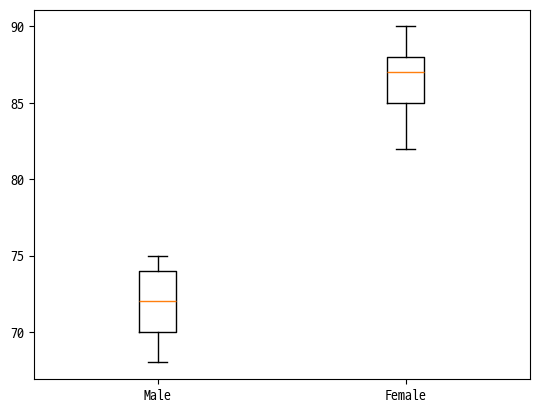

In [10]:
# 여기에 코드를 작성하세요!
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.boxplot([df[df['gender'] == 'Male']['math_score'] , df[df['gender'] == 'Female']['math_score']], labels=["Male","Female"])
plt.show()



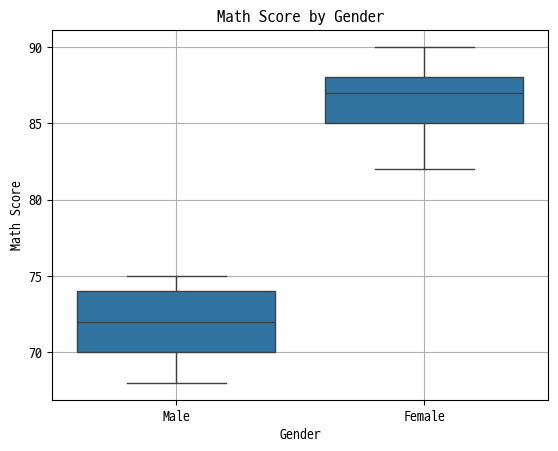

In [11]:
# 모범 답안

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. 박스플롯 시각화
sns.boxplot(x='gender', y='math_score', data=df)
plt.title('Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()



<br/><br/>

문제 2) scipy.stats.ttest_ind를 이용해 독립 표본 t-검정을 수행하시오.

독립 표본 t-검정은 두 집단의 평균이 **통계적으로 유의미하게 다른지**를 검정하는 방법입니다.

p-value를 통해 성별에 따른 수학 점수 **차이의 유의성**을 판단할 수 있습니다.





In [12]:
# 여기에 코드를 작성하세요!
from scipy.stats import ttest_ind

ttest, pvalue = ttest_ind(df[df['gender'] == 'Male']['math_score'] , df[df['gender'] == 'Female']['math_score'])

print(f"t-test 통계량: {ttest}")
print(f"p-value: {pvalue}")

t-test 통계량: -7.804028263842797
p-value: 5.2180435750018335e-05


In [13]:
# 모범 답안

# 2. t-검정 수행
male_scores = df[df['gender'] == 'Male']['math_score']
female_scores = df[df['gender'] == 'Female']['math_score']

t_stat, p_value = ttest_ind(male_scores, female_scores)
print(f"📌 t-statistic: {t_stat:.2f}")
print(f"📌 p-value: {p_value:.4f}")


📌 t-statistic: -7.80
📌 p-value: 0.0001


<br/><br/>

문제 3) 결과를 바탕으로 귀무가설 기각 여부와 결론을 기술하시오.

##### [결과 해석]
- 박스플롯을 통해 여학생들의 점수가 전반적으로 더 높게 나타남

- p-value < 0.05 이므로 귀무가설은 기각됨

- 즉, 성별에 따라 수학 점수에 유의미한 차이가 있다고 판단됨

- 여학생의 평균 점수가 더 높으므로 성별이 수학 점수에 영향을 줄 수 있음



<br/>

---

<br/><br/>


# **이변량 분석 3: 범주형-범주형 변수 분석하기**





In [20]:
import pandas as pd

data = {
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'purchased': ['Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)
df.head()


,gender,purchased
0,Male,Yes
1,Female,Yes
2,Male,No
3,Female,Yes
4,Male,No



## 💡 실습 주제  
> **“고객의 성별과 구매 여부가 서로 관련이 있는지를 통계적으로 검정합니다.”**

-> 교차표 , 카이제곱 검정 사용
- 귀무가설(H₀): 성별과 구매 여부는 서로 독립이다 (관련이 없다).

- 대립가설(H₁): 성별과 구매 여부는 서로 독립이 아니다 (관련이 있다).

---

## 🧮 교차표(Contingency Table)를 사용 이유

- 성별과 구매 여부는 **모두 범주형 변수**입니다.
- 이 경우 각 범주의 **빈도수 분포**를 확인하는 것이 우선입니다.
- **교차표(crosstab 또는 contingency table)** 는  
  두 범주형 변수의 조합별로 **몇 명이 해당하는지**를 표로 보여줍니다.

> ✅ 성별에 따라 구매 여부가 어떻게 분포하는지  
> 직접 비교할 수 있도록 정리해주는 것이 교차표입니다.

예시 :


|            | 구매함 | 구매 안함 |
|------------|--------|-----------|
| 남성       |  30    |    70     |
| 여성       |  50    |    50     |

---

## 📊 카이제곱 검정(Chi-Square Test) 사용 이유

### 📌 카이제곱 검정이란?
- 두 범주형 변수 간에 **통계적으로 연관성이 있는지** 확인하는 방법입니다.
- "성별과 구매 여부는 **독립적이다**"라는 가정(귀무가설)을 세우고,  
  실제 데이터가 그 가정과 얼마나 다른지를 검정합니다.

- 귀무가설(H0): 성별과 구매 여부는 **관련이 없다** (독립이다)  
- 대립가설(H1): 성별과 구매 여부는 **관련이 있다**

> 검정 결과 **p-value가 0.05보다 작으면**,  
> "두 변수는 통계적으로 유의미한 관련이 있다"고 해석합니다.

---

## 🔍 정리

| 분석 요소        | 왜 사용하는가? |
|------------------|----------------|
| **교차표**           | 두 범주형 변수의 **빈도수를 비교**하기 위해 사용 |
| **카이제곱 검정**     | 두 범주형 변수 사이의 **관계가 유의미한지 검정**하기 위해 사용 |
| **p-value**         | 그 관계가 **우연인지 아닌지 판단**하기 위해 사용 |







<br/><br/>
<br/>

위 데이터를 사용하여:

문제 1) pd.crosstab()으로 성별과 구매 여부의 교차표를 만들고 sns.heatmap()으로 시각화하시오.

**pd.crosstab()**은 두 범주형 변수 간의 **빈도(개수)**를 교차표 형태로 만들어줍니다.

**sns.heatmap()**은 이 교차표를 **색의 진하기로 시각화**해 패턴을 쉽게 파악할 수 있게 해줍니다.

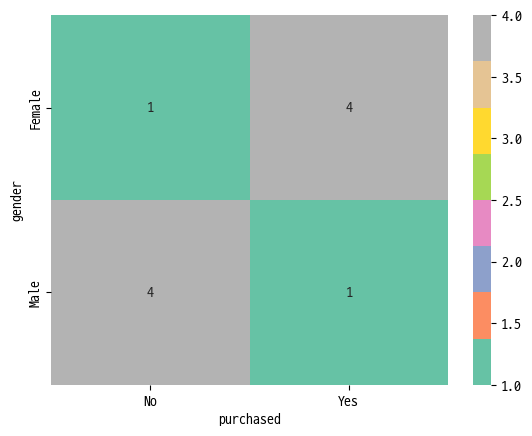

In [23]:
# 여기에 코드를 작성하세요!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crosstab = pd.crosstab(df['gender'], df['purchased'])

sns.heatmap(crosstab, cmap='Set2', annot=True)
plt.show()


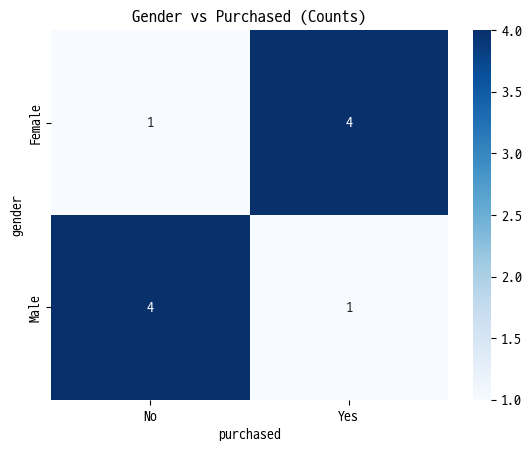

In [16]:
# 모범 답안

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. 교차표 생성 및 시각화
cross_tab = pd.crosstab(df['gender'], df['purchased'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Gender vs Purchased (Counts)')
plt.show()




<br/><br/>

문제 2) scipy.stats.chi2_contingency를 이용해 카이제곱 독립성 검정을 수행하시오.

**카이제곱 독립성 검정**은 두 범주형 변수 간에 연관성이 있는지를 판단하는 통계 기법입니다.

**p-value**를 통해 성별과 구매 여부가 통계적으로 독립적인지 확인할 수 있습니다.

In [25]:
# 여기에 코드를 작성하세요!

from scipy.stats import chi2_contingency

chi2, pvalue, dof, expected_freq = chi2_contingency(crosstab)

print(f"카이제곱 통계량: {chi2}")
print(f"p-value: {pvalue}")


카이제곱 통계량: 1.6
p-value: 0.20590321073206466


In [18]:
# 모범 답안

# 2. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"📌 Chi-square statistic: {chi2:.2f}")
print(f"📌 p-value: {p:.4f}")


📌 Chi-square statistic: 1.60
📌 p-value: 0.2059


<br/><br/>

문제 3) 결과를 바탕으로 귀무가설 기각 여부와 두 변수의 관계를 해석하시오.

##### [결과 해석]
- 교차표를 통해 여성의 'Yes'(구매) 비율이 높고, 남성은 'No'(비구매) 비율이 높아 보임

- p-value < 0.05 이므로 귀무가설은 기각됨

- 즉, 성별과 구매 여부는 통계적으로 유의미한 관련이 있음

- 실무적으로는 성별에 따라 마케팅 전략을 다르게 적용할 수 있음을 의미할 수 있음



<br/>

---

<br/><br/>


# **이변량 분석 4: 숫자형-범주형 변수 분석하기**





In [31]:
import pandas as pd

data = {
    'level': ['Regular', 'Premium', 'Regular', 'Premium', 'Regular', 'Premium',
              'Regular', 'Premium', 'Regular', 'Premium'],
    'purchase_amount': [120, 220, 130, 250, 110, 270, 115, 240, 125, 260]
}
df = pd.DataFrame(data)
df.head()


,level,purchase_amount
0,Regular,120
1,Premium,220
2,Regular,130
3,Premium,250
4,Regular,110


## 💡 실습 주제  
> **“고객의 회원 등급(level)에 따라 총 구매 금액(purchase_amount)에 차이가 있는지를 검정합니다.”**

-> 박스플롯, 독립표본 t-검정


- 귀무가설(H₀): 일반회원과 프리미엄회원의 평균 구매 금액은 차이가 없다.

- 대립가설(H₁): 일반회원과 프리미엄회원의 평균 구매 금액에는 차이가 있다.
---

## 🖼️ 왜 시각화는 박스플롯(Box Plot)을 사용할까?

- 회원 등급(level)은 **범주형 변수**,  
  총 구매 금액(purchase_amount)은 **숫자형 변수**입니다.
- 이런 경우, 각 등급별로 금액의 **분포와 중앙값 차이**를 비교할 수 있는  
  **박스플롯**이 효과적입니다.

박스플롯은 다음을 한눈에 보여줍니다:
- 각 등급별 **중앙값**과 **전체 분포**
- 이상치(outliers)의 존재
- 금액이 많은 등급과 적은 등급 간 **차이의 시각적 비교**

> ✅ 회원 등급이 올라갈수록 구매 금액이 커지는 경향이 있는지를  
> 시각적으로 먼저 파악할 수 있습니다.

---

## 📊 왜 독립표본 t-검정(Independent t-test)을 사용할까?

### 📌 독립표본 t-검정이란?
- 두 집단 간 **평균 차이가 통계적으로 유의미한지**를 검정하는 방법입니다.
- 여기서는 예를 들어, “일반 회원과 프리미엄 회원의 구매 금액 평균이 같은가?”를 검정합니다.

- 귀무가설(H0): 두 그룹의 평균은 **차이가 없다**  
- 대립가설(H1): 두 그룹의 평균은 **차이가 있다**

> t-검정 결과의 **p-value가 0.05보다 작으면**,  
> 두 회원 등급 간 구매 금액 차이가 **유의미하다**고 해석할 수 있습니다.

---

## 🔍 정리

| 분석 요소            | 왜 사용하는가? |
|----------------------|----------------|
| **박스플롯**             | 범주별 숫자형 변수의 **분포와 차이 시각화**를 위해 사용 |
| **독립표본 t-검정**      | 두 집단 간 평균 차이가 **통계적으로 유의미한지 검정**하기 위해 사용 |
| **p-value**             | 차이가 **우연인지 아닌지 판단**하기 위해 사용 |




<br/><br/><br/>

위 데이터를 사용하여:

문제 1) 회원 등급(level)에 따른 구매 금액의 박스플롯을 그리시오.

박스플롯은 등급별 구매 금액 **분포, 중앙값, 이상치**를 한눈에 비교할 수 있습니다.

각 회원 등급에 따라 구매 패턴에 차이가 있는지 시각적으로 확인해보세요.

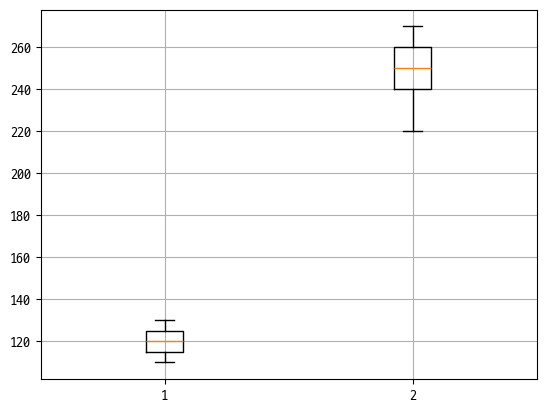

In [32]:
# 여기에 코드를 작성하세요!

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.boxplot([df[df['level'] == 'Regular']['purchase_amount'],df[df['level'] == 'Premium']['purchase_amount']], label=["Regular","Premium"])
plt.grid(True)
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_2360\3358508905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='level', y='purchase_amount', data=df, palette='Set2')


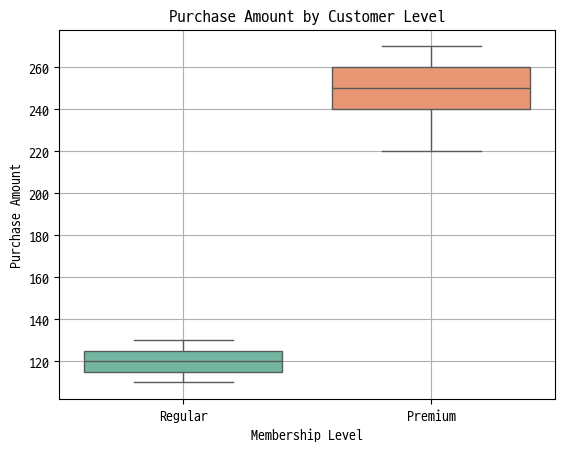

In [33]:
# 모범 답안

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. 박스플롯 시각화
sns.boxplot(x='level', y='purchase_amount', data=df, palette='Set2')
plt.title('Purchase Amount by Customer Level')
plt.xlabel('Membership Level')
plt.ylabel('Purchase Amount')
plt.grid(True)
plt.show()




<br/><br/>

문제 2) scipy.stats.ttest_ind를 이용해 독립 표본 t-검정을 수행하시오.

**독립 표본 t-검정**은 두 그룹의 평균 차이가 통계적으로 유의미한지 비교하는 방법입니다.

**p-value**를 통해 일반 회원과 프리미엄 회원 간 **구매 금액 차이**의 유의성을 판단할 수 있습니다.

In [34]:
# 여기에 코드를 작성하세요!

regular = df[df['level'] == 'Regular']['purchase_amount']
premium = df[df['level'] == 'Premium']['purchase_amount']

tstat, pvalue = ttest_ind(regular, premium)
print(f"t-test 통계량: {tstat}")
print(f"p-value: {pvalue}")


t-test 통계량: -13.76264526260404
p-value: 7.497249234106582e-07


In [23]:
# 모범 답안

# 2. 독립 표본 t-검정 수행
regular = df[df['level'] == 'Regular']['purchase_amount']
premium = df[df['level'] == 'Premium']['purchase_amount']

t_stat, p_value = ttest_ind(regular, premium)
print(f"📌 t-statistic: {t_stat:.2f}")
print(f"📌 p-value: {p_value:.4f}")

📌 t-statistic: -13.76
📌 p-value: 0.0000




<br/><br/>



문제 3) 결과를 바탕으로 귀무가설 기각 여부와 두 변수의 관계를 해석하시오.


##### [결과 해석]
- 박스플롯에서 프리미엄 회원의 구매 금액이 전체적으로 더 높음

- p-value < 0.05 이므로 귀무가설은 기각됨

- 즉, 회원 등급에 따라 구매 금액에 유의미한 차이가 존재함

- 실무적으로는 프리미엄 회원에게 더 높은 매출이 발생함을 의미할 수 있음


<br/><br/><br/>
